# Práctica 1. Parte 2. _Apendicitis_

Instalamos las dependencias de este código en primer lugar (`%%capture` sirve para que no se muestren las salidas de la celda)

In [72]:
%%capture
!pip install pandas
!pip install numpy
!pip install matplotlib

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## 1. Enunciado
El objetivo de esta práctica es entrenar una neurona artiﬁcial para que sea capaz de detectar si un paciente puede o menos sufrir de apendicitis.

En primer lugar hay que descargar los archivos appendicitis.dat y muestra\_pacientes.dat de la base de datos keel Dataset ([enlace](https://sci2s.ugr.es/keel/dataset.php?cod=183))

In [74]:
# Carga de los datos del dataset de entrenamiento:
data = pd.read_csv('appendicitis/data.csv')

In [75]:
# Dividimos en porcentaje de entrenamiento y prueba:
train_percent = 0.8
test_percent = 1 - train_percent

train_data = data.sample(frac=train_percent)
test_data = data.copy().drop(train_data.index)

Una vez la neurona pueda leer el archivo se pide:

1\. Añadir como opción una función de salida que proceda de f (p) = sin(p) en [−1, 1] con imagen en el intervalo apropiado.

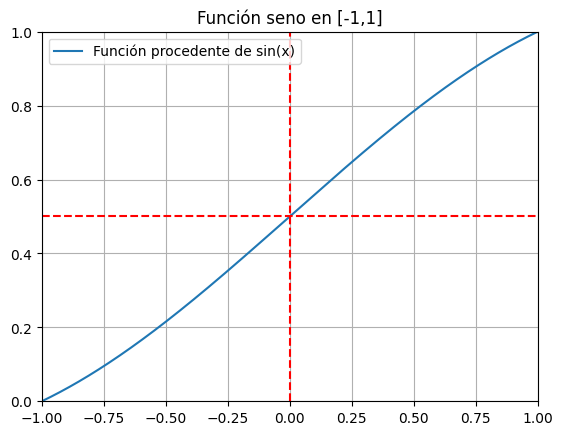

In [76]:
# Función 1
def sin(x):
    """Calcula el seno de un número x, con imagen entre 0 y 1.
    Precondiciones: x ∈ [-1,1]"""
    # Normalización de la imagen al intervalo [0,1]
    return (math.sin(x) - math.sin(-1)) * (1 - 0) / (math.sin(1) - math.sin(-1))


# Representamos esta función en el intervalo correspondiente para
# cerciorarnos de su correcta definición:

x = np.linspace(-1, 1, 1000)
f_x = [sin(i) for i in x]

plt.plot(x, f_x)
plt.title("Función seno en [-1,1]")
plt.axvline(x=0, color="r", linestyle="--")
plt.axhline(y=0.5, color="r", linestyle="--")

plt.xlim(-1, 1)
plt.ylim(0, 1)

plt.grid()
plt.legend(["Función procedente de sin(x)"])
plt.show()


2\. Añadir como opción una función de salida que proceda de f(_p_) = 1/(1+ _e_<sup>−p</sup>) en (0, 1), con imagen en
el intervalo apropiado

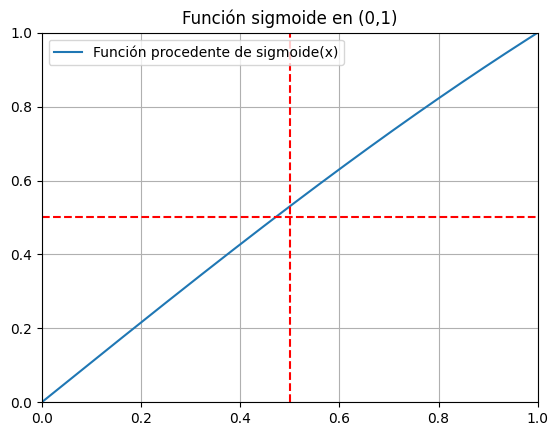

In [77]:
# Función 2
def sigmoide(x):
    """Calcula el valor de la función f(x) = 1/(1 + e^(-x)), con
    imagen entre 0 y 1.
    Precondiciones: x ∈ (0, 1)"""

    # Nótese que sigmoide(0) = 0 y sigmoide(1) = 1, luego no habría problema con esos valores.

    def sig(x):
        return 1 / (1 + math.exp(-x))

    return (sig(x) - sig(0)) * (1 - 0) / (sig(1) - sig(0))


# Representamos esta función en el intervalo correspondiente para
# cerciorarnos de su correcta definición:

x = np.linspace(0, 1, 1000)
f_x = [sigmoide(i) for i in x]

plt.plot(x, f_x)
plt.title("Función sigmoide en (0,1)")
plt.axvline(x=0.5, color="r", linestyle="--")
plt.axhline(y=0.5, color="r", linestyle="--")

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.grid()
plt.legend(["Función procedente de sigmoide(x)"])
plt.show()

3\. Añadir como opción una función de salida que proceda de f (p) = ex p(−p<sup>2</sup>) en (0, 1] con imagen en el
intervalo apropiado

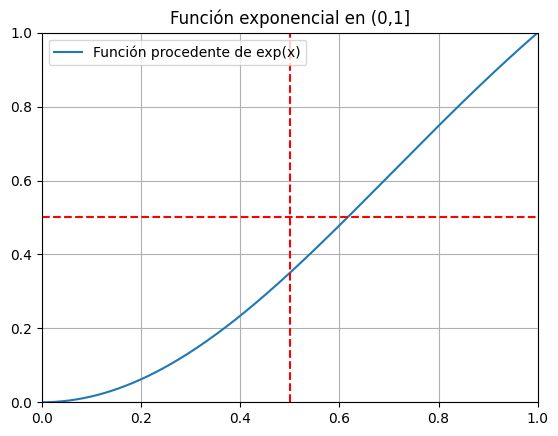

In [78]:
# Función 3
def exponencial(x):
    """Calcula el valor de la función f(x) = e^-(x^2), con imagen entre 0 y 1.
    Precondiciones: x ∈ (0, 1]"""
    
    # Nótese que exponencial(0) = '-0.0' por errores de cómputo, aunque a efectos
    # prácticos es lo mismo que 0 a la hora de sumarlo o restarlo, pero no al tener
    # en cuenta el signo.

    def exp(x):
        return math.exp(-(x**2))

    # Normalización de la imagen al intervalo [0,1]
    return (exp(x) - exp(0)) * (1 - 0) / (exp(1) - exp(0))

# Representamos esta función en el intervalo correspondiente para
# cerciorarnos de su correcta definición:

x = np.linspace(0, 1, 1000)
f_x = [exponencial(i) for i in x]

plt.plot(x, f_x)
plt.title("Función exponencial en (0,1]")
plt.axvline(x=0.5, color="r", linestyle="--")
plt.axhline(y=0.5, color="r", linestyle="--")

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.grid()
plt.legend(["Función procedente de exp(x)"])
plt.show()

4\. Añadir como opción una función de salida que proceda de f(_p_) = _p_/(1 + (_p_<sup>2</sup>)) en [−0,5, 0,5], con imagen

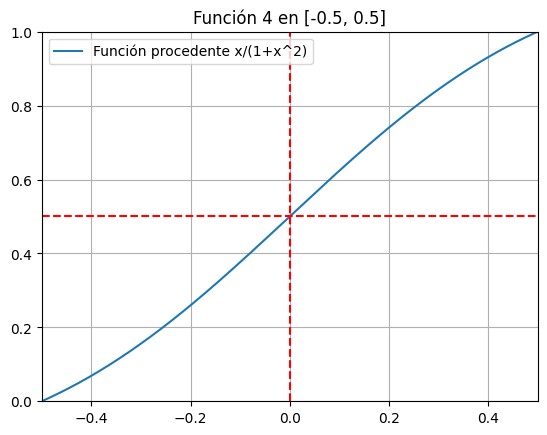

In [79]:
# Función 4
# Ya que no he encontrado un nombre común a esta función, la he llamado 'fun_p'
def fun_p(x):
    """Calcula el valor de la función f(x) = 1/(1 + x^2), con
    imagen entre 0 y 1.
    Precondiciones: x ∈ [-0.5, 0.5]"""

    def p(x):
        return x / (1 + x**2)

    # Normalización de la imagen al intervalo [0,1]
    return (p(x) - p(-0.5)) * (1 - 0) / (p(0.5) - p(-0.5))

# Representamos esta función en el intervalo correspondiente para
# cerciorarnos de su correcta definición:

x = np.linspace(-0.5, 0.5, 1000)
f_x = [fun_p(i) for i in x]

plt.plot(x, f_x)
plt.title("Función 4 en [-0.5, 0.5]")
plt.axvline(x=0, color="r", linestyle="--")
plt.axhline(y=0.5, color="r", linestyle="--")

plt.xlim(-0.5, 0.5)
plt.ylim(0, 1)

plt.grid()
plt.legend(["Función procedente x/(1+x^2)"])
plt.show()
